決定木を使おう

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./input/data13.csv')
df.head(3)

,x0,x1,y
0,6.938582,17.623393,0.0
1,27.417628,8.180353,0.0
2,21.562673,11.799253,0.0


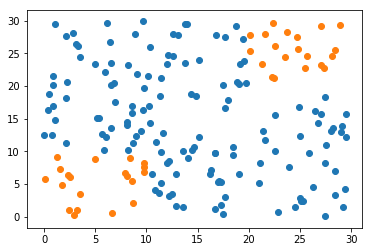

In [2]:
plt.scatter(df[df['y'] == 0]['x0'],df[df['y'] == 0]['x1'])
plt.scatter(df[df['y'] == 1]['x0'],df[df['y'] == 1]['x1']);

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(
X,y,test_size=0.3,random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
tree.score(X_test,y_test)

0.8518518518518519

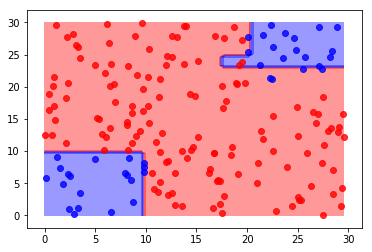

In [8]:
from plot_tree import plot_tree
plot_tree(tree,X,y)

In [ ]:
#! FILE plot_tree.py決定木の結果を見やすいように
import numpy as np
import matplotlib.pyplot as plt


def arange2(a, num):
    """numpy.ndarrayを最小と最大の間でnum+1分割する"""
    amin, amax = a.min(), a.max()
    return np.arange(amin, amax + 1e-8, (amax - amin) / num)


def plot_tree(clf, X, y, num=50, colors=('red', 'blue')):
    """
    X[:, 0]とX[:, 1]の2次元で、yの0-1ラベルによる散布図と
    予測（clf.predict）の等高線（contourf）を描画
    """
    from matplotlib.colors import ListedColormap
    xx0, xx1 = np.meshgrid(arange2(X[:, 0], num), arange2(X[:, 1], num))
    Z = clf.predict(np.array([xx0.ravel(), xx1.ravel()]).T).reshape(xx0.shape)
    plt.contourf(xx0, xx1, Z, alpha=0.4, cmap=ListedColormap(colors))
    for i in range(2):
        plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, c=colors[i])
    plt.show()